# How to read in X-123 debug data
I'm making this because Ping found a bug in the X-123 decoder with a specific data file.
So here is how to read in some X-123 data with the fixed decoder.

In [1]:
import gzip
import os

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from umndet.ground import helpers

In [2]:
# Load in X123 data
folder = "data"
files = [f"{folder}/{fn}" for fn in os.listdir(folder) if ("x123" in fn)]

data = []
for fn in files:
    data += helpers.read_x123_debug(fn, open_func=gzip.open)
    print(data)

decoded = [d.decode() for d in data]

base64 encoded status data: /ZMDAIgdAwAAAAAAMawLAAmNBADfkwQAandEjAAA/vwImyYvIgSAAAAAABQCxwAAf0YAAAAAAAAAAAAAAAAAAA==


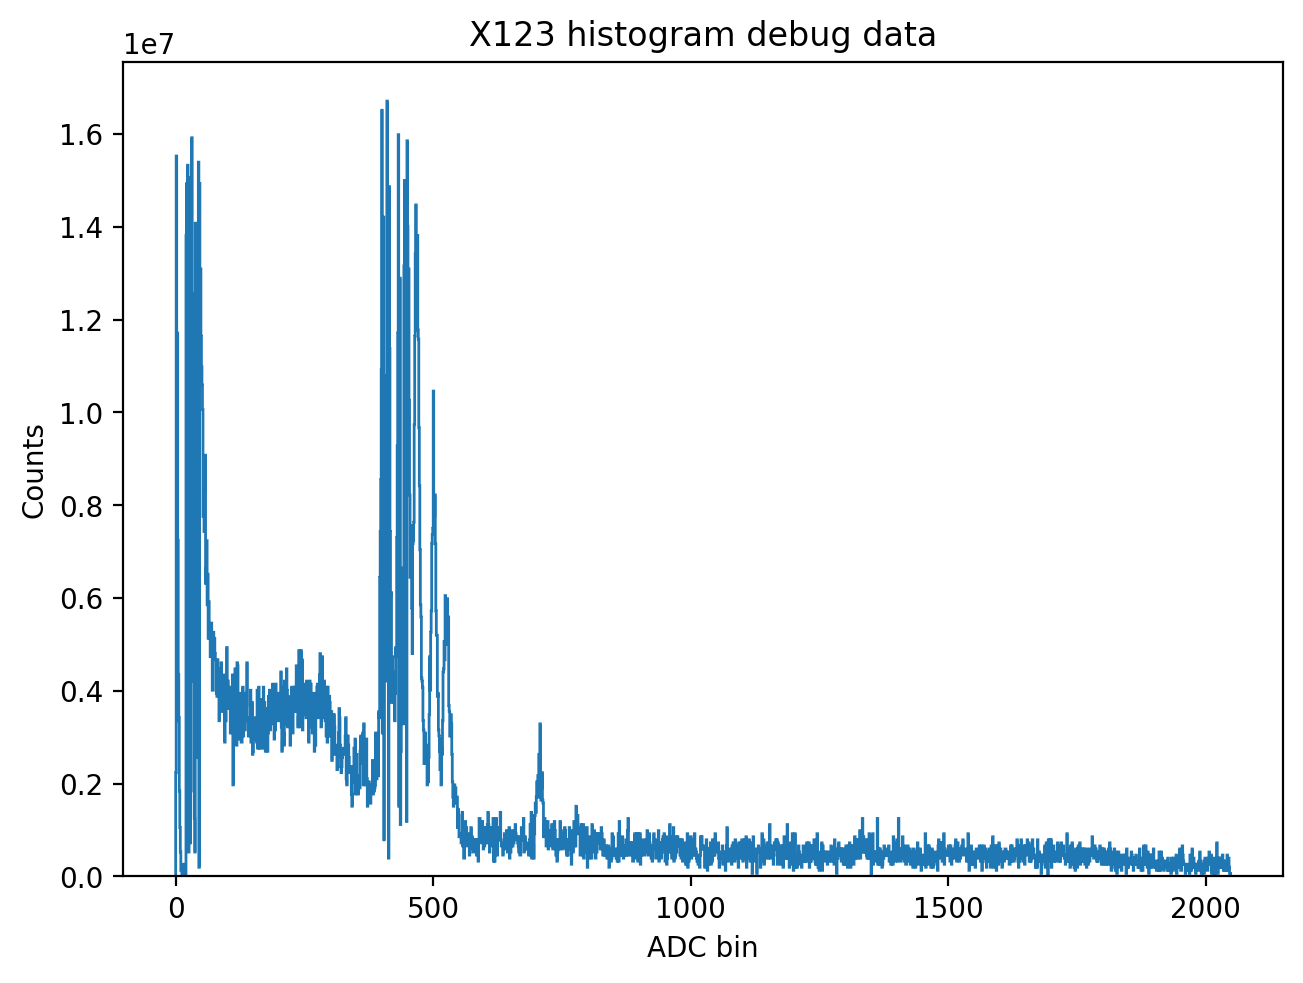

In [3]:
test = decoded[0]

# if we don't have a histogram, throw an error at this point
if test["type"] != "histogram":
    raise ValueError("This cell only works with histogram debug data")

# the status data is base64 encoded binary data (https://en.wikipedia.org/wiki/Base64)
# we don't really care about it but we can check it if we want
# status is documented in the Amptek programmer's guide, page 70
# https://millenia.cars.aps.anl.gov/software/epics/DP5%20Programmer%27s%20Guide%20B1.pdf
status = test["data"]["status"]
print("base64 encoded status data:", status)

# get the histogram out of the decoded debug data
# its number of bins is configured on the flight computer
histogram = np.array(test["data"]["histogram"])
bins = np.arange(histogram.size + 1)

fig, ax = plt.subplots(layout="constrained")

ax.stairs(histogram, bins)
ax.set(xlabel="ADC bin", ylabel="Counts", title="X123 histogram debug data")

plt.show()